# Simulation 03

##### 2018-10-10  Josep Fortiana

## Basic acceptance-rejection algorithm

A straightforward implementation of the basic acceptance-rejection algorithm. 
Code for generating a sequence of random numbers following a given probability distribution, with parameters:
- `n` is the sequence length,
- `f` is the target pdf, 
- `g` is the candidate pdf, 
- `rg` is a function that generates random numbers following `g`. 
- `c` is the constant such that `f(x)<=c * g(x)` for all `x`.

The function returns a list with `z`, the sequence of random numbers, and `Proportion` of accepted values.

In [3]:
Accept.Reject<-function(f,g,rg,c,n=1.0e4){
    z<-rep(0,n) 
    N<-0
    for (i in 1:n){
        accept<-FALSE
        while (accept == FALSE){
            u <- runif(1)
            v <- rg(1)
            N<-N+1
            if (c*u <= f(v)/g(v)){
                z[i] <- v
                accept <- TRUE
                }
            }
        }
    Proportion<-n/N
    return(list(z=z,Proportion=Proportion))
    }

### Exercise 1

Generate a sequence of random numbers following a $\mbox{Beta}(2,2)$ using a $\mbox{Unif}(0,1)$ candidate pdf.

The target pdf `f(x)`is:

$$
    f(x)=6\,x\,(1-x)=6\,(x-x^{2}), \quad x\in(0,1).
$$

The candidate $\mbox{Unif}(0,1)$ pdf is:

$$
    g(x)=1, \quad x\in(0,1).
$$

The steps are:

   1. Calculate `c` such that `f(x)<=c * g(x)`,  _[Hint: plot both `f(x)`and `g(x)`],_
   2. Use the `Accept.Reject` function above (or some improvement thereof) for several `n` values,
   3. Plot histograms of the resulting sequences, superimposing the graph of `f(x)`,
   4. Compare the actual acceptance rate to the thoretical value `1/c`.


Loading required package: MASS
Warning message:
"package 'MASS' was built under R version 3.4.4"

[1] 0.6622517
[1] 0.660502


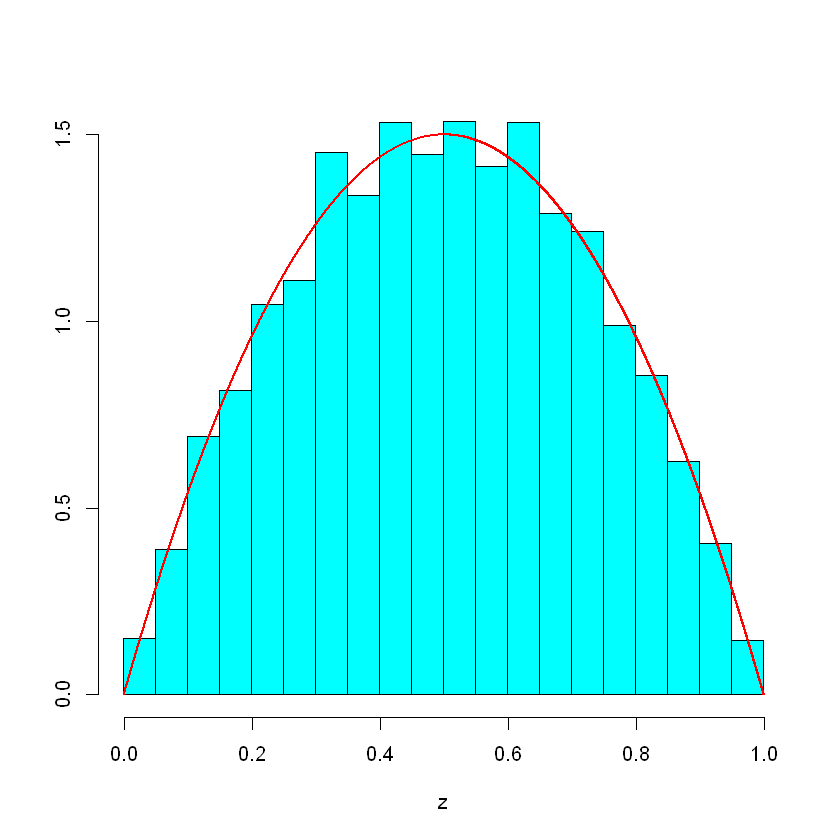

In [4]:
#
#    Insert here your code
#
require(MASS)
f<-function(x){
    return (6*x*(1-x))
}
g<-function(x){
    return (1+x*0)
    #return (1.51*(0*x+1))
}

x<-seq(0,1,length.out=500)
# print(x)
# print(g(x))
#plot(x,f(x),type='l')
c=1.51
#lines(x,c*g(x), col='red')
n = 1.0e4
x<-seq(0,1,length.out=n)
# print(n)
result = Accept.Reject(f,g,runif,c)
z=result$z
acc=result$Proportion
truehist(z)
lines(x, f(x), col='red', lwd=2)
print (1/c)
print (acc)

### Exercise 2

Generate a sequence of random numbers following a $\mbox{Beta}(2,3)$ using a $\mbox{Unif}(0,1)$ candidate pdf.

The target pdf `f(x)`is:

$$
    f(x)=12\,x\,(1-x)^2, \quad x\in(0,1).
$$

The candidate $\mbox{Unif}(0,1)$ pdf is:

$$
    g(x)=1, \quad x\in(0,1).
$$

The steps are:

   1. Calculate `c` such that `f(x)<= c * g(x)`,  
   
       _Hint: as above, plot both `f(x)`and `g(x)`, then locate the maximum of `f(x)` using code such as:_
       ```
       optimize(f=function(x){dbeta(x,2,3)},interval=c(0,1),maximum=TRUE)
       
       ```
       
   2. Use the `Accept.Reject` function above (or some improvement thereof) for several `n` values,
   3. Plot histograms of the resulting sequences, superimposing the graph of `f(x)`,
   4. Compare the actual acceptance rate to the thoretical value `1/c`.


[1] 0.5586592
[1] 0.5525472


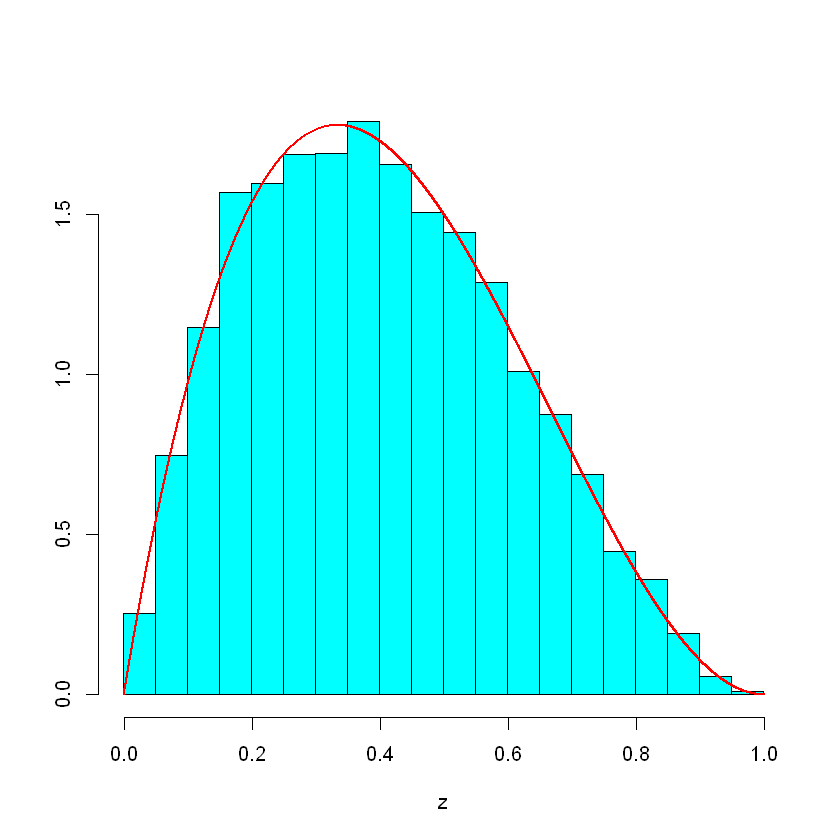

In [13]:
#
#    Insert here your code
#
require(MASS)
f<-function(x){
    return (12*x*(1-x)**2)
}
g<-function(x){
    return (1+x*0)
    #return (1.51*(0*x+1))
}

x<-seq(0,1,length.out=500)
# print(x)
# print(g(x))
# plot(x,f(x),type='l')
c=1.79
# lines(x,c*g(x), col='red')
n = 1.0e4
x<-seq(0,1,length.out=n)
# print(n)
result = Accept.Reject(f,g,runif,c)
z=result$z
acc=result$Proportion
truehist(z)
lines(x, f(x), col='red', lwd=2)
print (1/c)
print (acc)

## Acceptance-rejection algorithm with a candidate pdf

### Exercise 3 - Beta(2,3) with a triangular pdf candidate

Generate a sequence of random numbers following a $\mbox{Beta}(2,3)$ using a triangular candidate pdf.

The target pdf `f(x)`is:

$$
    f(x)=12\,x\,(1-x)^2, \quad x\in(0,1).
$$

The triangular pdf `g(x)` is constructed along the following steps:

   1. Plot `f(x)` and the tangent line `L1` to `f(x)` at `(0,0)`
   
        ![Alt text](./Beta.2.3.jpg)
   
   2. Find the equation of the line `L2`through the point `(1,0)` and tangent to `f(x)`
   
   3. The piecewise linear function with domain `(0,1)` defined by `L1` and `L2` will be the majorizing function:
   
   $$
       c \cdot g(x) = \left\{
       \begin{array}{lcl}
       12\,x, &\mbox{ if }  &x\in(0,1/5),\\
       3-3\,x,&\mbox{ if }  &x\in(1/5,1).
       \end{array}
       \right.
   $$
   
   4. Compute $c$ by imposing the condition that $g$ must be a pdf, that is, its integral must be equal to 1. _[Hint: compute $c\cdot G(x)$, the integral of $c\cdot g$ on $(-\infty,x]$, since anyway you need the cdf $G(x)$ to obtain the quantile function]_
   
   Result is: $c=6/5$. Thus, the candidate pdf is:

   $$
       g(x) = \left\{
       \begin{array}{lcl}
       10\,x, &\mbox{ if }  &x\in(0,1/5),\\
       \frac{5}{2}\,(1-x),&\mbox{ if }  &x\in(1/5,1).
       \end{array}
       \right.
   $$
       
   5. Compute the quantile function $Q(y)=G^{-1}(y)$ and use it to write a function `rg` implementing a random number generator for the candidate $g$ density by the inverse transformation method. Check that it works OK (by comparing the `hist` of its output with the triangular pdf `g`)
   
   6. Use the `Accept.Reject` function above (or some improvement thereof) for several `n` values,
   7. Plot histograms of the resulting sequences, superimposing the graph of `f(x)`,
   8. Compare the actual acceptance rate to the thoretical value `1/c`.


In [ ]:
#
#    Insert here your code
#

### Exercise 4 - Normal random numbers from a Laplace distribution

Normal $\sim\operatorname{N}(0,1)$ from a $\operatorname{Laplace}(\alpha)$

Assume we want to generate RN following the $\operatorname{N}(0,1)$ distribution, whose pdf is:

$$
	f(x)=\dfrac{1}{\sqrt{2\,\pi}}\,\exp\left\{-\dfrac{1}{2}\,x^{2}\right\}.
$$

Our candidate pdf is in the $\operatorname{Laplace}(\alpha)$ family:

$$
	g(x|\alpha)=\dfrac{\alpha}{2}\,\exp\left\{-\alpha\,x\right\}.
$$

#### Remark: 

The `extraDistr` package contains the Laplace distribution (and many more).

also installing the dependencies 'praise', 'statmod', 'survival', 'expint', 'testthat', 'LaplacesDemon', 'VGAM', 'evd', 'hoa', 'skellam', 'triangle', 'actuar'



package 'praise' successfully unpacked and MD5 sums checked
package 'statmod' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'expint' successfully unpacked and MD5 sums checked
package 'testthat' successfully unpacked and MD5 sums checked
package 'LaplacesDemon' successfully unpacked and MD5 sums checked
package 'VGAM' successfully unpacked and MD5 sums checked
package 'evd' successfully unpacked and MD5 sums checked
package 'hoa' successfully unpacked and MD5 sums checked
package 'skellam' successfully unpacked and MD5 sums checked
package 'triangle' successfully unpacked and MD5 sums checked
package 'actuar' successfully unpacked and MD5 sums checked
package 'extraDistr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\ASUS\AppData\Local\Temp\RtmpoLKp7Q\downloaded_packages


Loading required package: extraDistr
Warning message:
"package 'extraDistr' was built under R version 3.4.4"

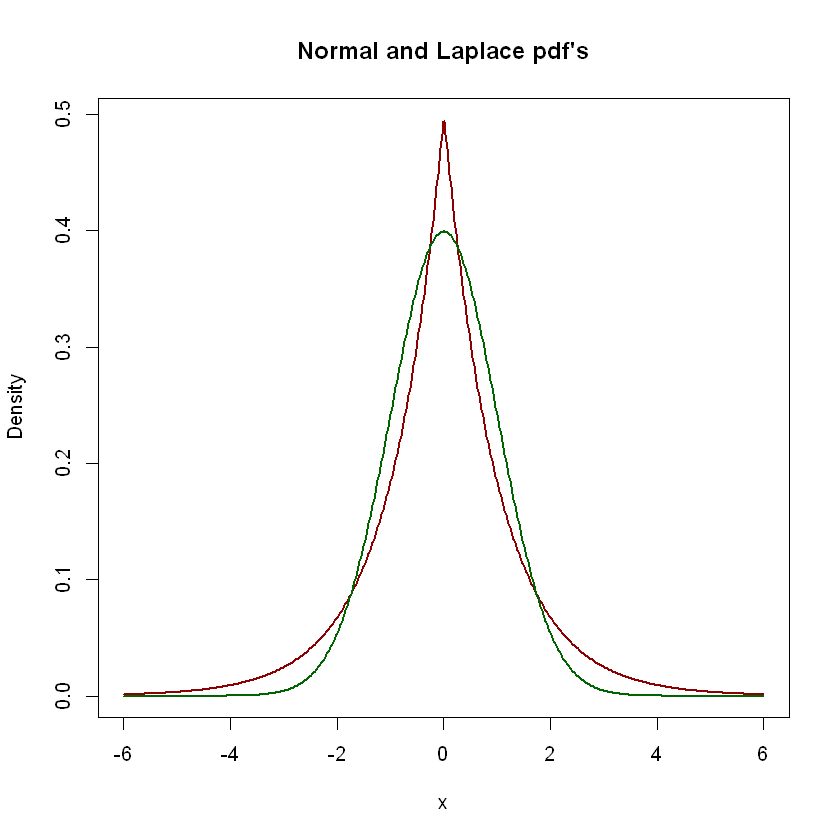

In [7]:
#install.packages("extraDistr",dependencies=TRUE,repos="https://cloud.r-project.org")
require(extraDistr)
x<-seq(-6,6,length=500)
alpha<-1
plot(x,dlaplace(x,mu=0,sigma=1),type="l",lwd=2.0,col="DarkRed",xlab="x",ylab="Density",main="Normal and Laplace pdf's")
lines(x,dnorm(x),lwd=2.0,col="DarkGreen")

#### cdf  for a $\operatorname{Laplace}(\alpha)$

$$
	G(x|\alpha)=\left\{\begin{array}{lll}
	\dfrac{1}{2}\,\exp(\alpha\,x),	&\text{ if }	&x<0,\\
	1-\dfrac{1}{2}\,\exp(-\alpha\,x),  &\text{ if }	&0\leq x.
	\end{array}\right.
$$

#### Quantile function for a $\operatorname{Laplace}(\alpha)$

$$
	Q(y|\alpha)=\left\{\begin{array}{lll}
	\hphantom{-}\dfrac{1}{\alpha}\,\log(2\,y),	&\text{ if }	&y\in(0,0.5),\\
	-\dfrac{1}{\alpha}\,\log(2(1-y)),  &\text{ if }	&y\in(0.5,1).
	\end{array}\right.
$$

Write a RNG to generate $\operatorname{Laplace}(\alpha)$-distributed random numbers by the inverse cdf method

In [18]:
#
#    Insert here your code
#

my.rlaplace<-function(n, alpha=1){
    y = runif(n)
    #print(y)
    return (ifelse(y <0.5, (1/alpha)*log(2*y), (-1/alpha)*(log(2*(1-y)))))    
}


[1] -0.132489386  5.486273721  0.520676934 -0.532527502  0.005077879

#### Find a suitable $\alpha$ and the proportion $M$ for the acceptance-rejection algorithm

Compute the quotient:

$$
	\dfrac{f(x)}{g(x)}=\sqrt{\dfrac{2}{\pi}}\,\dfrac{1}{\alpha}\,
	\exp\left\{-\dfrac{1}{2}\,x^{2}+\alpha\,|x|\right\}
$$

For $x>0$, the exponent is $>0$ when $x\in(0,2\,\alpha)$, with maximum $\alpha^{2}/2$ at $x=\alpha$. 

Symmetrically for $x<0$.
	
Substituting, we get a function of $\alpha$:

$$
	K(\alpha)=\dfrac{f(\alpha)}{g(\alpha)}
	=\sqrt{\dfrac{2}{\pi}}\,\dfrac{1}{\alpha}\,e^{\alpha^{2}/2}.
$$

The maximum of $K(\alpha)$ is attained for $\alpha=1$. Then,

$$
	K(\alpha)\leq K_{\max}=\sqrt{\dfrac{2\,e}{\pi}}=1.315489.
$$

We take this value as $M$.

Generate a sequence of $\operatorname{N}(0,1)$-distributed random numbers with the acceptance-rejection algorithm, using a $\operatorname{Laplace}(\alpha=1)$ candidate pdf and proportionality constant $M=1.315489$. Use several sample sizes $n$.

Plot a histogram of the resulting numbers. Superimpose to it the $\operatorname{N}(0,1)$ pdf.

Evaluate the acceptance rate from the theoretical formula. Check that the actual observed proportion of accepted values approaches this value for large $n$.

[1] 0.760624
[1] 0.7601736


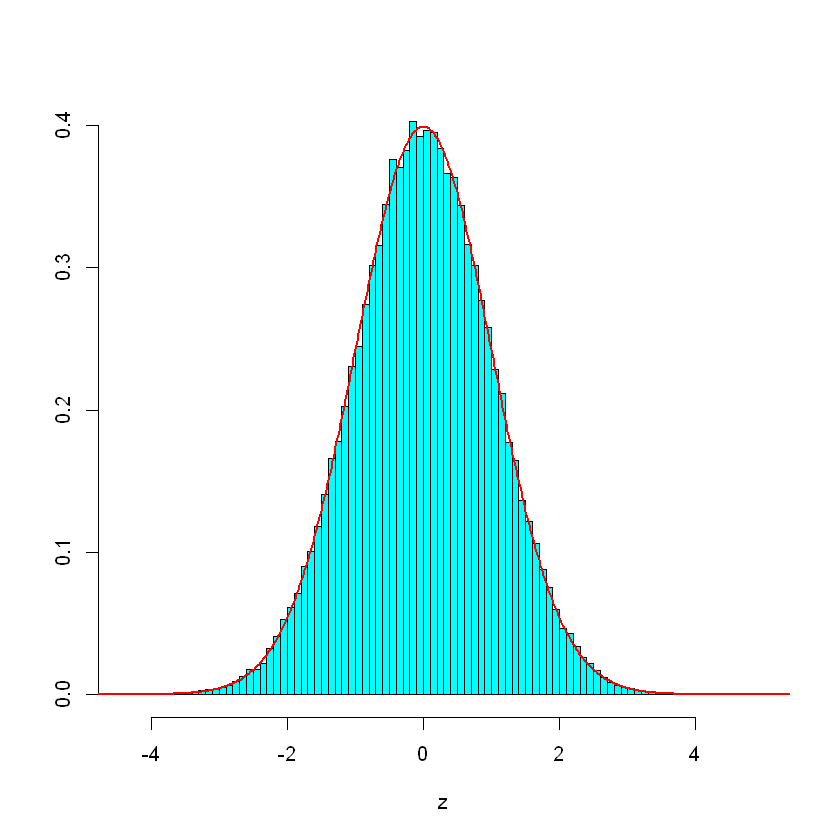

In [27]:
#
#    Insert here your code
#
require(extraDistr)
results = Accept.Reject(f=dnorm, g=dlaplace, rg=my.rlaplace, c=1.315489, n=100000)
z = results$z

truehist(z)
x<-seq(-6,6,length=500)
lines(x,dnorm(x), col='red', lwd=2)
acc=results$Proportion
print(acc)
M = 1.315489
print(1/M)